In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，分别使用最小二乘法以及梯度下降两种办法优化w。

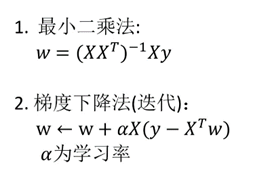

In [2]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    def identity_basis(x):
        ret = np.expand_dims(x, axis=1)                             #shape(N, 1)
        return ret
    
    basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    #np.ones_like(x_train)作出和xtrain([[x1,...x300]])同样shape（300，）的全1数组
    #np.expand_dims(）扩展np.ones_like(x_train)的第一维，其shape变成（300,1）
    #最终生成（300,1）的全1数组
    
    phi1 = basis_func(x_train)
    #将xtrain的shape（300，）扩展成（300,1），变成（300,1）列向量([x1][x2]...[x300])T
    
    phi = np.concatenate([phi0, phi1], axis=1)#将两个数组合并成([1,x1],[1,x2],...,[1,x300])T，shape为（300,2）

    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    #1.最小二乘法
    X=np.mat(phi)#将输入解释为矩阵
    Y=np.mat(y_train).T
    XTX = np.dot(X.T,X)#需为方阵才能用linalg
    if np.linalg.det(XTX) == 0.0:#判断矩阵是否可逆，不可逆时行列式为0
        print("矩阵不可逆，无法求解")
        return
    w = np.dot(np.dot(np.linalg.inv(XTX), X.T), Y)#点乘，np.linalg.inv(XTX)求矩阵的逆
    #print(type(w))
    
#     #2.梯度下降法
#     def dJ(theta, phi, y):
#         return phi.T.dot(phi.dot(theta)-y)*2.0/len(phi)
 
#     def gradient(phi, y, initial_theta, eta=0.001, n_iters=10000):#梯度
#         w = initial_theta
 
#         for i in range(n_iters):
#             gradient = dJ(w, phi, y)                #计算梯度
#             w = w - eta *gradient                   #更新w
#         return np.mat(w).T##将w类型从ndarray转化为matrix(1,2),经转置得（2,1）
 
#     initial_theta = np.zeros(phi.shape[1])#建立与phi的列数相同的全0数组，初始化梯度
#     w= gradient(phi, y_train, initial_theta)#调用函数更新梯度
#    # print(type(w))
    
    
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

评估结果

(300,)
(200,)
<class 'numpy.matrix'>
训练集预测值与真实值的标准差：0.2
预测值与真实值的标准差：0.2


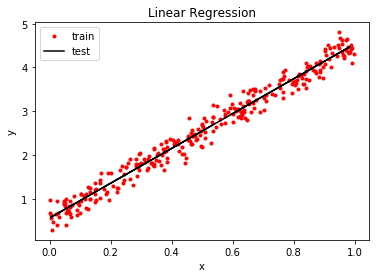

In [3]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)
    #print(type(f(x_train)))
    
    y_train_pred = f(x_train).A.ravel()#.A把矩阵转化成数组，ravel降维
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test).A.ravel()
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()